In [ ]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 11.4 MB/s eta 0:00:00


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import shap


In [ ]:
%matplotlib inline


In [ ]:
# Load the dataset (Assuming CSV file)
df = pd.read_csv('/content/survey lung cancer.csv')

In [ ]:
print(positive_cases.head())


Empty DataFrame
Columns: [GENDER, AGE, SMOKING, YELLOW_FINGERS, ANXIETY, PEER_PRESSURE, CHRONIC DISEASE, FATIGUE , ALLERGY , WHEEZING, ALCOHOL CONSUMING, COUGHING, SHORTNESS OF BREATH, SWALLOWING DIFFICULTY, CHEST PAIN, LUNG_CANCER]
Index: []


In [ ]:
# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  
0              

In [ ]:
# Perform basic EDA
print("\nSummary of the dataset:")
print(df.describe(include='all'))


Summary of the dataset:
       GENDER         AGE     SMOKING  YELLOW_FINGERS     ANXIETY  \
count     309  309.000000  309.000000      309.000000  309.000000   
unique      2         NaN         NaN             NaN         NaN   
top         M         NaN         NaN             NaN         NaN   
freq      162         NaN         NaN             NaN         NaN   
mean      NaN   62.673139    1.563107        1.569579    1.498382   
std       NaN    8.210301    0.496806        0.495938    0.500808   
min       NaN   21.000000    1.000000        1.000000    1.000000   
25%       NaN   57.000000    1.000000        1.000000    1.000000   
50%       NaN   62.000000    2.000000        2.000000    1.000000   
75%       NaN   69.000000    2.000000        2.000000    2.000000   
max       NaN   87.000000    2.000000        2.000000    2.000000   

        PEER_PRESSURE  CHRONIC DISEASE    FATIGUE     ALLERGY     WHEEZING  \
count      309.000000       309.000000  309.000000  309.000000  309.

In [ ]:
# Check for null values
print("\nChecking for null values:")
print(df.isnull().sum())


Checking for null values:
GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64


In [ ]:
# Check for duplicate entries and remove them if any
print("\nChecking for duplicate entries:")
print("Number of duplicate rows:", df.duplicated().sum())
df = df.drop_duplicates()


Checking for duplicate entries:
Number of duplicate rows: 33


In [ ]:
# Check the distribution of the target variable
print("\nDistribution of the target variable:")
print(df['LUNG_CANCER'].value_counts())


Distribution of the target variable:
LUNG_CANCER
YES    238
NO      38
Name: count, dtype: int64


In [ ]:
# Initialize visualization style and custom palette
sns.set(style="whitegrid")
palette = sns.color_palette("coolwarm", 10)

In [ ]:
# Create a new dataframe containing only positive cases
positive_cases = df[df['LUNG_CANCER'] == 'Yes']

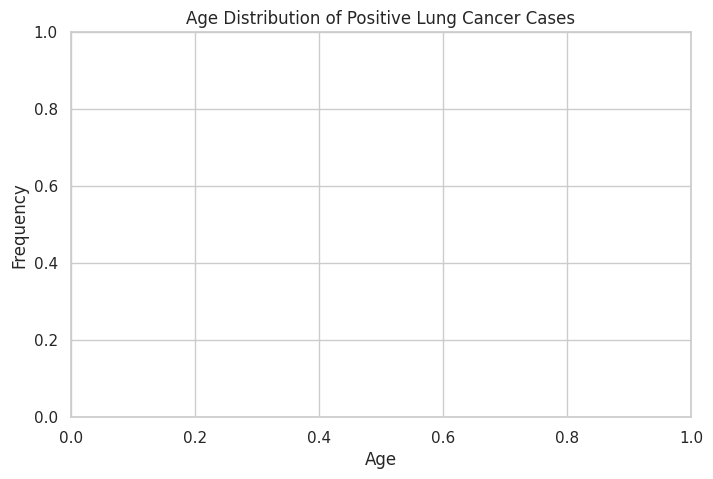

In [ ]:
# Age distribution for positive cases
plt.figure(figsize=(8, 5))
sns.histplot(positive_cases['AGE'], bins=20, color='salmon')
plt.title("Age Distribution of Positive Lung Cancer Cases")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


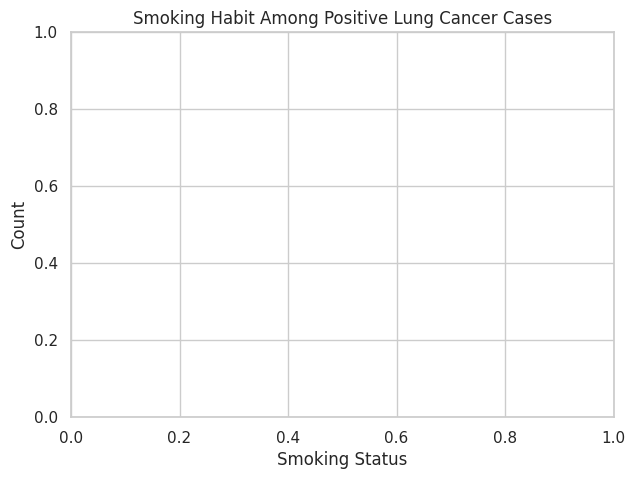

In [ ]:
# Smoking status among positive cases
smoking_status = positive_cases['SMOKING'].value_counts()

plt.figure(figsize=(7, 5))
sns.barplot(x=smoking_status.index, y=smoking_status.values, palette=palette)
plt.title("Smoking Habit Among Positive Lung Cancer Cases")
plt.ylabel("Count")
plt.xlabel("Smoking Status")
plt.show()


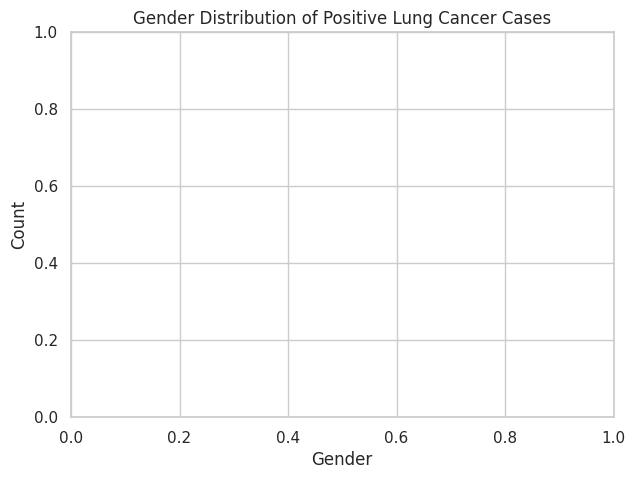

In [ ]:
# Gender distribution for positive cases
gender_distribution = positive_cases['GENDER'].value_counts()

plt.figure(figsize=(7, 5))
sns.barplot(x=gender_distribution.index, y=gender_distribution.values, palette=palette)
plt.title("Gender Distribution of Positive Lung Cancer Cases")
plt.ylabel("Count")
plt.xlabel("Gender")
plt.show()


In [ ]:
# Visualize positive cases by age for both male and female
plt.figure(figsize=(14, 7))
plt.show()

<Figure size 1400x700 with 0 Axes>

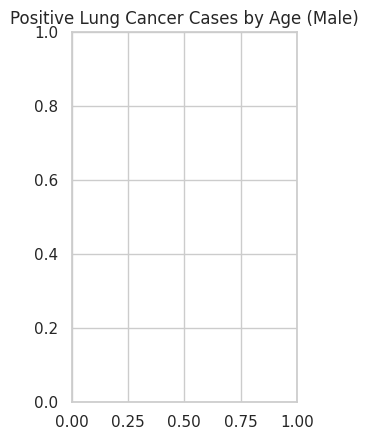

In [ ]:
plt.subplot(1, 2, 1)
sns.histplot(positive_cases[positive_cases['GENDER'] == 'Male']['AGE'], bins=20, color='blue')
plt.title("Positive Lung Cancer Cases by Age (Male)")
plt.show()

Text(0.5, 1.0, 'Positive Lung Cancer Cases by Age (Female)')

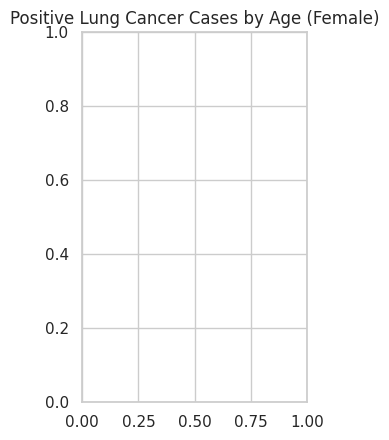

In [ ]:
plt.subplot(1, 2, 2)
sns.histplot(positive_cases[positive_cases['GENDER'] == 'Female']['AGE'], bins=20, color='pink')
plt.title("Positive Lung Cancer Cases by Age (Female)")

In [ ]:
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

In [ ]:
# Gender distribution for positive cases
gender_distribution = positive_cases['GENDER'].value_counts()

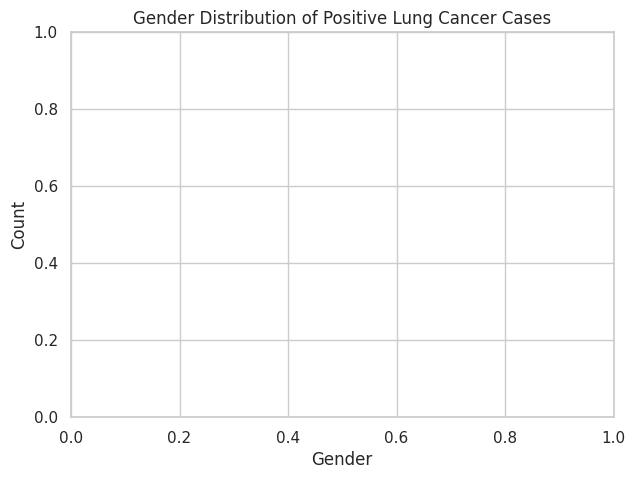

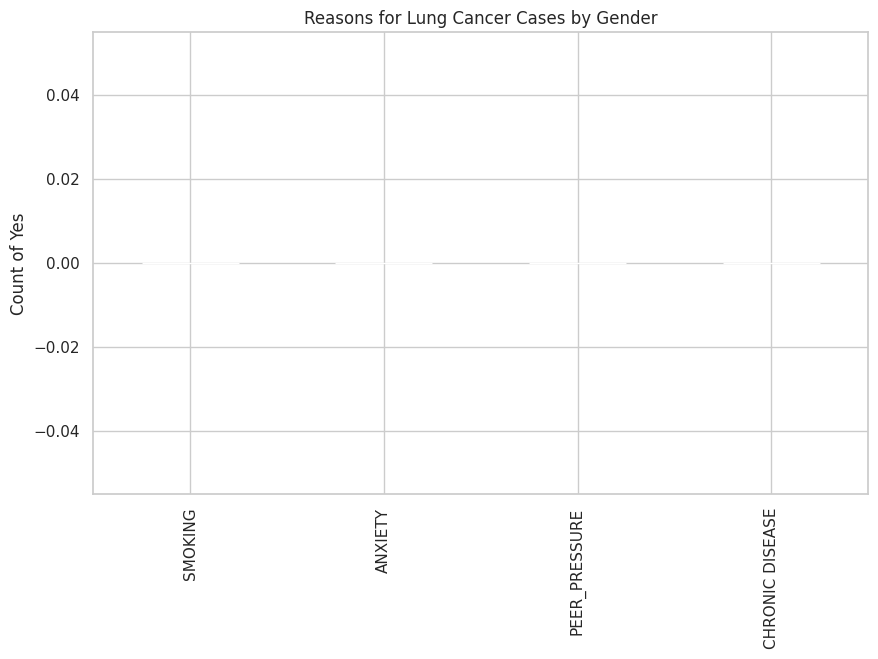

In [ ]:
plt.figure(figsize=(7, 5))
sns.barplot(x=gender_distribution.index, y=gender_distribution.values, palette=palette)
plt.title("Gender Distribution of Positive Lung Cancer Cases")
plt.ylabel("Count")
plt.xlabel("Gender")
plt.show()

# Gender-wise reasons for positive cases
gender_reasons = positive_cases.groupby('GENDER')[['SMOKING', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE']].apply(lambda x: x == 'Yes').sum()

plt.figure(figsize=(10, 6))
gender_reasons.T.plot(kind='bar', stacked=True, color=palette)
plt.title("Reasons for Lung Cancer Cases by Gender")
plt.ylabel("Count of Yes")
plt.show()

In [ ]:
# Replace numeric values with categorical values
df['LUNG_CANCER_ENCODED']= df['LUNG_CANCER'].replace({2: 'Yes', 1: 'NO'})
df['GENDER'] = df['GENDER'].replace({0: 'Male', 1: 'Female'})

In [ ]:
# Check the columns in the dataset
print(df.columns)

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER',
       'LUNG_CANCER_ENCODED'],
      dtype='object')


In [ ]:
# Encoding categorical features to numerical
le = LabelEncoder()
df['LUNG_CANCER_ENCODED'] = le.fit_transform(df['LUNG_CANCER'])  # Binary encoding for target variable
df['PEER_PRESSURE_ENCODED'] = le.fit_transform(df['PEER_PRESSURE'])
df['ANXIETY_ENCODED'] = le.fit_transform(df['ANXIETY'])
df['ALCOHOL_CONSUMING_ENCODED'] = le.fit_transform(df['ALCOHOL CONSUMING'])
df['SMOKING_ENCODED'] = le.fit_transform(df['SMOKING'])
df['CHRONIC_DISEASE_ENCODED'] = le.fit_transform(df['CHRONIC DISEASE'])
df['GENDER_ENCODED'] = le.fit_transform(df['GENDER'])  # Binary encoding for gender

In [ ]:
# Keep the original columns, but only use encoded columns for modeling
X = df[['PEER_PRESSURE_ENCODED', 'ANXIETY_ENCODED', 'ALCOHOL_CONSUMING_ENCODED',
        'SMOKING_ENCODED', 'CHRONIC_DISEASE_ENCODED', 'GENDER_ENCODED']]  # Features
y = df['LUNG_CANCER_ENCODED']  # Target variable

In [ ]:
# Check the data types of the dataframe to ensure all are numeric
print(df.dtypes)

GENDER                       object
AGE                           int64
SMOKING                       int64
YELLOW_FINGERS                int64
ANXIETY                       int64
PEER_PRESSURE                 int64
CHRONIC DISEASE               int64
FATIGUE                       int64
ALLERGY                       int64
WHEEZING                      int64
ALCOHOL CONSUMING             int64
COUGHING                      int64
SHORTNESS OF BREATH           int64
SWALLOWING DIFFICULTY         int64
CHEST PAIN                    int64
LUNG_CANCER                  object
LUNG_CANCER_ENCODED           int64
PEER_PRESSURE_ENCODED         int64
ANXIETY_ENCODED               int64
ALCOHOL_CONSUMING_ENCODED     int64
SMOKING_ENCODED               int64
CHRONIC_DISEASE_ENCODED       int64
GENDER_ENCODED                int64
dtype: object


In [ ]:
# Splitting features (X) and target (y)
# X contains the predictor features (all numeric features)
X = df[['PEER_PRESSURE_ENCODED', 'ANXIETY_ENCODED', 'ALCOHOL_CONSUMING_ENCODED',
        'SMOKING_ENCODED', 'CHRONIC_DISEASE_ENCODED', 'GENDER_ENCODED']]  # Features

# y contains the target variable (whether the person has lung cancer or not)
y = df['LUNG_CANCER_ENCODED']  # Target variable (encoded as 0 or 1)


In [ ]:
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Encode the 'GENDER' column to numerical values: Male -> 0, Female -> 1
df['GENDER_ENCODED'] = le.fit_transform(df['GENDER'])

# Verify that the GENDER_ENCODED column contains numeric values
print(df[['GENDER', 'GENDER_ENCODED']].head())  # Checking original vs encoded gender

  GENDER  GENDER_ENCODED
0      M               1
1      M               1
2      F               0
3      M               1
4      F               0


In [ ]:
# Handling class imbalance using SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [ ]:
# Split the balanced dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [ ]:
# Logistic Regression with Hyperparameter Tuning using GridSearchCV
param_grid_log_reg = {'C': [0.1, 1, 10, 100], 'solver': ['liblinear']}
log_reg = GridSearchCV(LogisticRegression(), param_grid_log_reg, cv=5)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Best parameters for Logistic Regression:", log_reg.best_params_)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

Best parameters for Logistic Regression: {'C': 1, 'solver': 'liblinear'}
Logistic Regression Accuracy: 0.8645833333333334
              precision    recall  f1-score   support

           0       0.90      0.85      0.87        52
           1       0.83      0.89      0.86        44

    accuracy                           0.86        96
   macro avg       0.86      0.87      0.86        96
weighted avg       0.87      0.86      0.86        96



In [ ]:
# SVM with Hyperparameter Tuning using GridSearchCV
param_grid_svm = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}
svm = GridSearchCV(SVC(), param_grid_svm, cv=5)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("Best parameters for SVM:", svm.best_params_)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

Best parameters for SVM: {'C': 10, 'kernel': 'rbf'}
SVM Accuracy: 0.9166666666666666
              precision    recall  f1-score   support

           0       0.91      0.94      0.92        52
           1       0.93      0.89      0.91        44

    accuracy                           0.92        96
   macro avg       0.92      0.91      0.92        96
weighted avg       0.92      0.92      0.92        96



In [ ]:
# XGBoost with Hyperparameter Tuning using GridSearchCV
param_grid_xgb = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1, 0.3], 'max_depth': [3, 5, 7]}
xgb = GridSearchCV(XGBClassifier(), param_grid_xgb, cv=5)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("Best parameters for XGBoost:", xgb.best_params_)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

Best parameters for XGBoost: {'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 200}
XGBoost Accuracy: 0.9166666666666666
              precision    recall  f1-score   support

           0       0.91      0.94      0.92        52
           1       0.93      0.89      0.91        44

    accuracy                           0.92        96
   macro avg       0.92      0.91      0.92        96
weighted avg       0.92      0.92      0.92        96



In [ ]:
# Display confusion matrices for all models
print("\nConfusion Matrix for Logistic Regression:")
print(confusion_matrix(y_test, y_pred_log_reg))


Confusion Matrix for Logistic Regression:
[[44  8]
 [ 5 39]]


In [ ]:
print("\nConfusion Matrix for SVM:")
print(confusion_matrix(y_test, y_pred_svm))


Confusion Matrix for SVM:
[[49  3]
 [ 5 39]]


In [ ]:
print("\nConfusion Matrix for XGBoost:")
print(confusion_matrix(y_test, y_pred_xgb))


Confusion Matrix for XGBoost:
[[49  3]
 [ 5 39]]


In [ ]:
# SHAP Explainability for the XGBoost Model
explainer = shap.TreeExplainer(xgb.best_estimator_)
shap_values = explainer.shap_values(X_test)

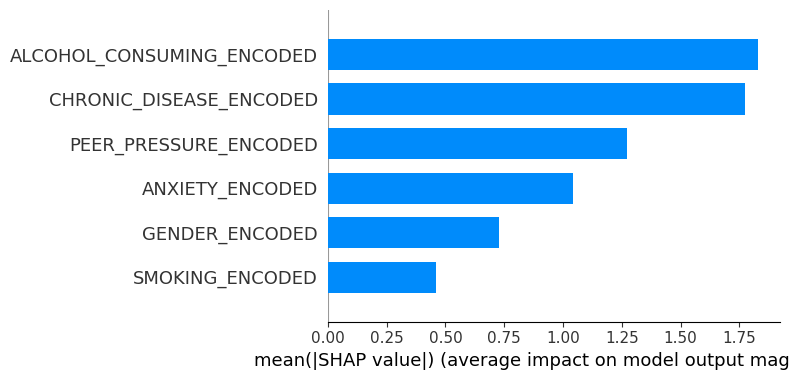

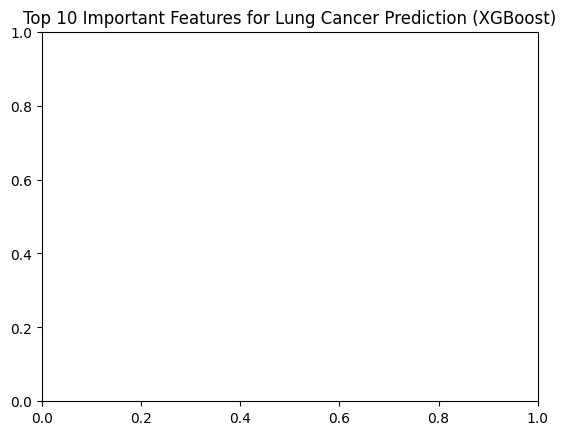

In [ ]:
# Plot SHAP summary plot
plt.figure()
shap.summary_plot(shap_values, X_test, plot_type="bar", max_display=10)
plt.title("Top 10 Important Features for Lung Cancer Prediction (XGBoost)")
plt.show()

In [ ]:
# Plot SHAP individual force plot (example for one sample)
shap.initjs()
sample_index = 0  # You can choose any test instance here
shap.force_plot(explainer.expected_value, shap_values[sample_index], X_test.iloc[sample_index])